## Phys H508 Solutions 1 - Surface Structure and Energy

#### 1) Hard-sphere crystals 
Assume atoms of diameter $D=0.25 nm$ in contact.

Calculate the length of the cubic cell $A$ and the volume fraction occupied by the spherical atoms for
1. a simple cubic crystal
2. a face-centered cubic (fcc) crystal
3. a body-centered cubic (bcc) crystal
4. a diamond-lattice cyrstal

### Some general functions to calculate crystal geometry

In [1]:
import numpy as np
from scipy import constants as pc
import matplotlib.pyplot as plt
%matplotlib inline
#vector math, a can be a single vector or an array of vectors...

def v_length(a):
    #vector length
    return np.sqrt(np.vdot(a,a))

def v_angle(a,b):
    #angle between vectors
    return np.arccos(np.vdot(a,b) / (v_length(a) * v_length(b)))

def distance(a,b):
    '''
    calculate the distance between two vector coordinates, or an
    array of distances between a single vector (a) and an array of vectors (b)
    '''
    if a.size == 3 and b.size == 3:
        x = a-b
        return np.sqrt(x[0]**2 + x[1]**2 + x[2]**2)
    x = a[np.newaxis,:]-b
    return np.sqrt(x[:,0]**2 + x[:,1]**2 + x[:,2]**2)

def vol_sphere(d):
    return (4/3)*np.pi*(d/2)**3

#cube in units of "A"
a=np.array((1,0,0))
b=np.array((0,1,0))
c=np.array((0,0,1))

Do=0.25e-9 #diameter in meters

In [2]:
#simple cubic lattice
A_sc = Do
print('Simple cubic lattice D/A is {:.3f}, A= {:.3g}'.format(1.0,A_sc))
v_sc=vol_sphere(A_sc/Do)
print('Simple cubic lattice volume fraction {:.3f}'.format(v_sc))

Simple cubic lattice D/A is 1.000, A= 2.5e-10
Simple cubic lattice volume fraction 0.524


In [3]:
#fcc lattice
#the 'basis' lists the atomic positions in the cubic cell
fcc_basis = np.array((0.0*(a+b),0.5*(a+b),0.5*(a+c),0.5*(b+c)))
print('fcc lattice basis has 4 atoms at\n',fcc_basis)

#side diagonal of cube is 2 Do
A_fcc=2**0.5 * Do
print('fcc lattice A/D is {:.3f}, A= {:.3g}'.format(A_fcc/Do,A_fcc))

v_fcc=fcc_basis.shape[0]*vol_sphere(Do)#count all 4 atoms
print('fcc lattice volume fraction {:.3f}'.format(v_fcc/A_fcc**3))

fcc lattice basis has 4 atoms at
 [[ 0.   0.   0. ]
 [ 0.5  0.5  0. ]
 [ 0.5  0.   0.5]
 [ 0.   0.5  0.5]]
fcc lattice A/D is 1.414, A= 3.54e-10
fcc lattice volume fraction 0.740


In [4]:
#bcc lattice
#the 'basis' lists the atomic positions in the cubic cell
bcc_basis = np.array((0.0*(a+b+c),0.5*(a+b+c)))
print('bcc lattice basis has 2 atoms at\n',bcc_basis)

#long diagonal of cube is 2 Do
A_bcc= 2*Do/3**0.5
print('bcc lattice A/D is {:.3f}, A= {:.3g}'.format(A_bcc/Do,A_bcc))
v_bcc=bcc_basis.shape[0]*vol_sphere(Do)#count all atoms
print('bcc lattice volume fraction {:.3f}'.format(v_bcc/A_bcc**3))

bcc lattice basis has 2 atoms at
 [[ 0.   0.   0. ]
 [ 0.5  0.5  0.5]]
bcc lattice A/D is 1.155, A= 2.89e-10
bcc lattice volume fraction 0.680


In [5]:
#diamond lattice is like an fcc latice at the origin added to one shifted by (a+b+c)/4
diamond_basis = np.append(fcc_basis, fcc_basis + (a+b+c)/4,axis=0)
print('diamond lattice basis has 8 atoms at\n',diamond_basis)

#long diagonal of cube is 4 Do
A_diamond=4*Do/3**.5
print('diamond lattice A/D is {:.3f}, A= {:.3g}'.format(A_diamond/Do,A_diamond))
v_diamond=diamond_basis.shape[0]*vol_sphere(Do)#count all atoms
print('diamond lattice volume fraction {:.3f}'.format(v_diamond/A_diamond**3))

diamond lattice basis has 8 atoms at
 [[ 0.    0.    0.  ]
 [ 0.5   0.5   0.  ]
 [ 0.5   0.    0.5 ]
 [ 0.    0.5   0.5 ]
 [ 0.25  0.25  0.25]
 [ 0.75  0.75  0.25]
 [ 0.75  0.25  0.75]
 [ 0.25  0.75  0.75]]
diamond lattice A/D is 2.309, A= 5.77e-10
diamond lattice volume fraction 0.340


#### 2) Hard-sphere fcc crystal
Assume the atoms have diameter $D=0.25 nm$. 
Calculate the density of surface atoms ($number/m^2$) and the area per surface unit cell for the 
1. (100)
2. (111) and 
3. (110) surfaces.

In [6]:
def v_area(a,b):
    return v_length(a)*v_length(b)*np.sin(v_angle(a,b))

#(100) surface
A = (a+b)/2   #primitive surface cell vectors
B = (a-b)/2
area_100 = A_fcc**2*v_area(A,B) #per surface cell
print('100 surface area {:.3g} m^2, atomic density {:.3g}/m^2'.format(area_100,1/area_100))

#(111) surface
A = (a+b)/2   #primitive surface cell vectors
B = (a+c)/2
area_111 = A_fcc**2*v_area(A,B) #per surface cell
print('111 surface area {:.3g} m^2, atomic density {:.3g}/m^2'.format(area_111,1/area_111))

#(110) surface
A = (a+b)/2   #primitive surface cell vectors
B = c
area_110 = A_fcc**2*v_area(A,B) #per surface cell
print('110 surface area {:.3g} m^2, atomic density {:.3g}/m^2'.format(area_110,1/area_110))

100 surface area 6.25e-20 m^2, atomic density 1.6e+19/m^2
111 surface area 5.41e-20 m^2, atomic density 1.85e+19/m^2
110 surface area 8.84e-20 m^2, atomic density 1.13e+19/m^2


#### 3) "1D" surface (edge) energies.

Assume the atoms have diameter $D$ with nearest-neighbor interaction energies $E_1$ and second-neighbor interaction energies $E_2$. Calculate both the energy per edge unit cell and energy density ($Energy/length$) for edges a, b, c and d.


![title text here](img/Ex1 2D crystals sol.png)

For each example the atoms in the edge unit cell that have lost first or second neighbors are highlighed, with darker colors showing more broken bonds. The total edge energy is divided among the two sides.
1. Edge a, $E_a = (E_1+2E_2)/2$, $L_a=D$, $J_a=\frac{1+2x}{2}\frac{E_1}{D}$ where $x=E_2/E1$
2. Edge b, $E_b = E_1+E_2$, $L_b=\sqrt2D$, $J_b=\frac{1+x}{\sqrt2}\frac{E_1}{D}$
3. Edge c, $E_c = (3E_1+4E_2)/2$, $L_c=\sqrt5D$, $J_c=\frac{3+4x}{2\sqrt5}\frac{E_1}{D}$
3. Edge d, $E_d = (4E_1+10E_2)/2$, $L_d=\sqrt10D$, $J_d=\frac{4+10x}{2\sqrt10}\frac{E_1}{D}$

### calculate edge energies as a function of first and second neighbor energies

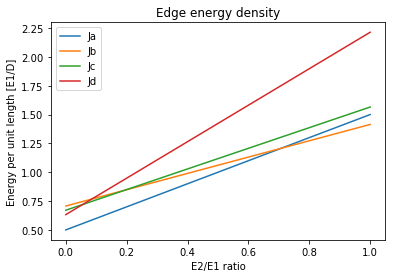

In [7]:
def e_a(x):
    return .5+x
def e_b(x):
    return (1+x)/2**.5
def e_c(x):
    return (3+4*x)/(2*5**.5)
def e_d(x):
    return (4+10*x)/(2*10**.5)
xx = np.linspace(0,1,20)
plt.plot(xx,e_a(xx),label='Ja')
plt.plot(xx,e_b(xx),label='Jb')
plt.plot(xx,e_c(xx),label='Jc')
plt.plot(xx,e_d(xx),label='Jd')
plt.legend()
plt.xlabel('E2/E1 ratio')
plt.ylabel('Energy per unit length [E1/D]')
plt.title('Edge energy density')

#### 4) Hard sphere BCC crystal
Sketch and calculate the area of the bcc surface unit cells in terms of atom diamter $D$ for the
1. (100)
2. (111)
3. (110) surfaces

The long diagonal is 2 atom diameters for bcc, so $\sqrt 3 \cdot A = 2 \cdot D$.

For each surface $\vec a$ and $\vec b$ are in-plane and $\vec c$ connects to the plane above:

For (100), $\vec a=\textstyle\frac{D}{\sqrt3} (2,0,0)$, 
$\vec b=\textstyle\frac{D}{\sqrt3} (0,2,0)$, $\vec c=\textstyle\frac{D}{\sqrt3} (1,1,1)$
![title](img/bcc 100.png)

For (110), $\vec a=\textstyle\frac{D}{\sqrt3} (1,+\sqrt2,0)$, $\vec b=\textstyle\frac{D}{\sqrt3} (1,-\sqrt2,0)$,  $\vec c=\textstyle\frac{D}{\sqrt3} (1,0,\sqrt2)$,
![title](img/bcc 110 111.png)
For (111), $\vec a=D \cdot (\textstyle\sqrt\frac{2}{3},+\sqrt2,0)$,
$\vec b=D \cdot (\textstyle\sqrt\frac{2}{3},-\sqrt2,0)$,
$\vec c=D \cdot (\textstyle\sqrt\frac{2}{3},\textstyle\frac{\sqrt2}{3},\textstyle\frac{1}{3})$

Here $\vec a$ and $\vec b$ describe the flat 2D surface and $\vec c$ connects to the next layer


#### 5) Cohesive Energy
Assume crystals with only pairwise nearest-neighbor bonds of energy $E_b = 1 eV$ and atoms with $D=0.25 nm$. What is the cohesive energy per cubic cell and energy density ($J/m^3$) for:
1. a fcc crystal

Each atom has 12 neighbors and the cubic cell has 4 atoms for 24$E_B$ per cell

In [8]:
J_fcc = 24 * pc.eV / A_fcc**3
E_fcc_mol = 6 * pc.eV * pc.Avogadro 
print('fcc energy density {:.3g} J/m3, or {:.3g} kJ/mol'.format(J_fcc,E_fcc_mol/1000))

fcc energy density 8.7e+10 J/m3, or 579 kJ/mol


5.2 bcc crystal

Each atom has 8 neighbors and the cubic cell has 2 atoms for 8$E_B$ per cell

In [9]:
J_bcc = 8 * pc.eV / A_bcc**3
E_bcc_mol = 4 * pc.eV * pc.Avogadro 
print('bcc energy density {:.3g} J/m3, or {:.3g} kJ/mol'.format(J_bcc,E_bcc_mol/1000))

bcc energy density 5.33e+10 J/m3, or 386 kJ/mol


5.3 diamond crystal

Each atom has 4 neighbors and the cubic cell has 8 atoms for 16$E_B$ per cell

In [10]:
J_diamond = 16 * pc.eV / A_diamond**3
E_diamond_mol = 2 * pc.eV * pc.Avogadro 
print('diamond energy density {:.3g} J/m3, or {:.3g} kJ/mol'.format(J_diamond,E_diamond_mol/1000))

diamond energy density 1.33e+10 J/m3, or 193 kJ/mol


5.3 simple cubic crystal

Each atom has 8 neighbors and the cubic cell has 1 atom for 4$E_B$ per cell

In [11]:
J_sc = 4 * pc.eV / A_sc**3
E_sc_mol = 4 * pc.eV * pc.Avogadro 
print('simple cube energy density {:.3g} J/m3, or {:.3g} kJ/mol'.format(J_sc,E_sc_mol/1000))

simple cube energy density 4.1e+10 J/m3, or 386 kJ/mol


#### 6) Morse Potential
Suppose an fcc crystal is described by a Morse potential with an equilibrium pair-bond length $D = 0.25 nm$ and a decay length $\lambda= 0.1 nm$. You can calculate surface energies by summing over interactions with neighboring atoms.
1. Estimate how many atoms you would need to include in the summation to calculate surface energies with 1% accuracy
2. Estimate the fcc crystal interatomic spacing. Will it be greater or lesser than 0.25 nm?


The Morse potential is $U(r)=U_o(e^{-\frac{2(r-r_o)}{\lambda}}-2e^{-\frac{r-r_o}{\lambda}})$. For more distant atoms we can approximate the sum over neighbors by an integral over $r^2 U(r)$ where r is in uints of $r_o$.

In [12]:
def Morse(r,L=0.1/0.25):
    return np.exp(-2*(r-1)/L) - 2*np.exp(-(r-1)/L)
def M_sum(r):
    return r**2 * Morse(r)
rr = np.arange(1,10)
M_sum(rr)

array([ -1.00000000e+00,  -6.29728201e-01,  -1.20874447e-01,
        -1.76938054e-02,  -2.26994496e-03,  -2.68318528e-04,
        -2.99784228e-05,  -3.21407888e-06,  -3.33906886e-07])

For 1% accuracy with $\frac{r_o}{\lambda}= 0.4$ interactions out to $r \approx 4r_o$ need to be included. Due to the attractive interaction of the distant neighbors, the equilibrium inter-atomic spacing will be less than $r_o$